<a href="https://colab.research.google.com/github/VishalShende358/Library-managment-system/blob/main/SQL_Pandas_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sqlite3


In [6]:
df = pd.read_csv('/content/Store.csv', encoding='unicode_escape')


In [7]:
con = sqlite3.connect('Store.db')

In [8]:
df.to_sql('Store', con, if_exists='replace', index=False)

9989

In [10]:
pd.read_sql_query("SELECT * FROM Store", con)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Product_Name,Sales,Quantity,Discount,Profit,Discount_Amount,Years,Customer_Duration,Returned_Items,Return_Reason
0,7981,CA-2011-103800,2013-01-03,2013-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,3.2896,2013,old customer,Not Returned,Not Returned
1,740,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Avery 508,11.784,3,0.2,4.2717,2.3568,2013,old customer,Not Returned,Not Returned
2,741,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,54.5472,2013,old customer,Not Returned,Not Returned
3,742,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,2.8320,2013,old customer,Not Returned,Not Returned
4,1760,CA-2011-141817,2013-01-05,2013-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,3.9072,2013,old customer,Not Returned,Not Returned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,908,CA-2014-143259,2016-12-30,2017-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,0.0000,2016,old customer,Not Returned,Not Returned
9985,909,CA-2014-143259,2016-12-30,2017-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,10.5552,2016,old customer,Not Returned,Not Returned
9986,1297,CA-2014-115427,2016-12-30,2017-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,2.7808,2016,old customer,Returned,Product Description Inaccurate
9987,1298,CA-2014-115427,2016-12-30,2017-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,GBC Binding covers,20.720,2,0.2,6.4750,4.1440,2016,old customer,Returned,Product Description Inaccurate


### **--Find Top  Reasons for returning.**

In [14]:
pd.read_sql('''select Return_reason,count(Return_reason)
             from store
             group by return_reason
             order by count(Return_reason) desc''', con)


,Return_Reason,count(Return_reason)
0,Not Returned,9189
1,Product Description Inaccurate,304
2,Customer Dissatified With Product,158
3,Product Arrived After Promised Delivery Date,100
4,Product Damaged,90
5,Product Ordered Accidently,81
6,Incorrect Products Delivered,67


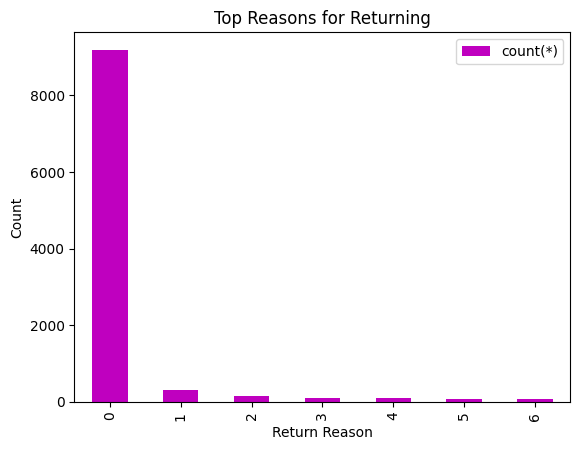

In [23]:
k = pd.read_sql('''select Return_Reason,count(*)
from store
group by Return_Reason
order by count(*) desc

''',con)
k.plot(kind = 'bar',color='m')
plt.xlabel('Return Reason')
plt.ylabel('Count')
plt.title('Top Reasons for Returning')
plt.show()

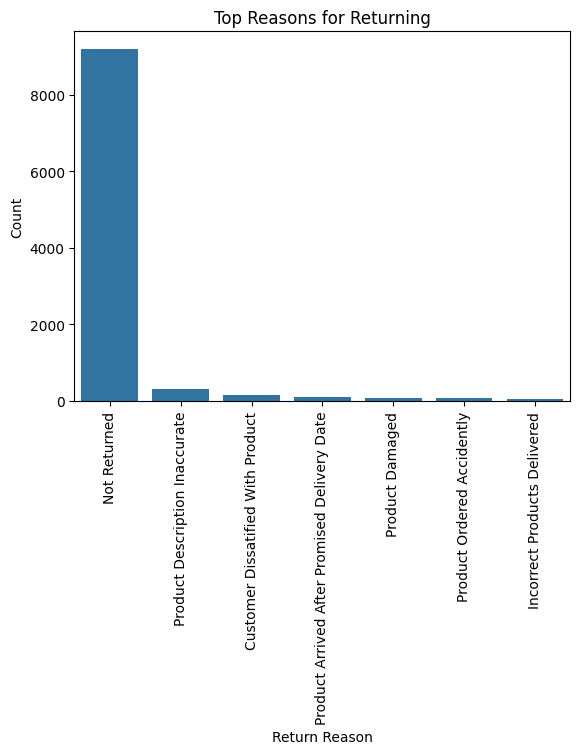

In [24]:
sns.barplot(data = k,x = 'Return_Reason',y = 'count(*)')
plt.xlabel('Return Reason')
plt.ylabel('Count')
plt.title('Top Reasons for Returning')
plt.xticks(rotation = 90)
plt.show()

### **Check whether new customers are returning higher or not.**

In [28]:
pd.read_sql('''select 	Customer_Duration,returned_items,count(*)
             from store
             group by returned_items,customer_duration
             HAVING returned_items = 'Returned'
             order by count(*) desc''', con)

,Customer_Duration,Returned_Items,count(*)
0,old customer,Returned,796
1,new customer,Returned,4


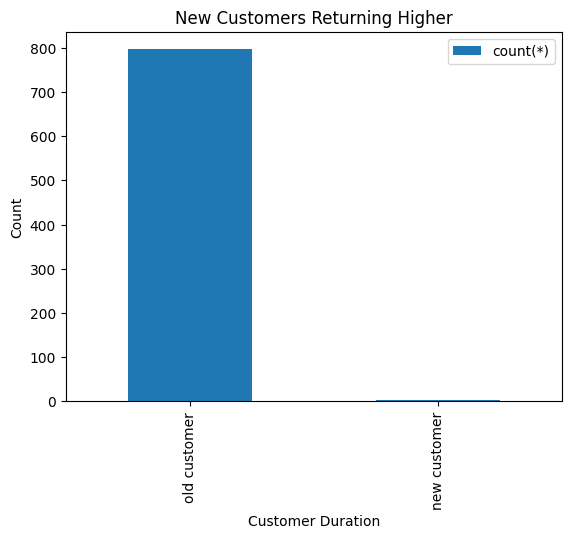

In [29]:
k=pd.read_sql('''select 	Customer_Duration,returned_items,count(*)
             from store
             group by returned_items,customer_duration
             HAVING returned_items = 'Returned'
             order by count(*) desc''', con)
k.plot(kind = 'bar',x = 'Customer_Duration',y = 'count(*)')
plt.xlabel('Customer Duration')
plt.ylabel('Count')
plt.title('New Customers Returning Higher')
plt.show()

### **Find Top 20 cities and states having higher return.**

In [30]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'States',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Discount_Amount', 'Years', 'Customer_Duration', 'Returned_Items',
       'Return_Reason'],
      dtype='object')

In [37]:
pd.read_sql(''' select Returned_items,states,city,count(Returned_items)as return_item_count from store
              group by Returned_items,states,city
              having Returned_items='Returned'
              order by count(Returned_items)
              limit 20''',con)

,Returned_Items,States,City,return_item_count
0,Returned,Arizona,Chandler,1
1,Returned,Arizona,Tucson,1
2,Returned,California,Camarillo,1
3,Returned,California,Escondido,1
4,Returned,California,La Quinta,1
5,Returned,California,Lake Elsinore,1
6,Returned,California,Lakewood,1
7,Returned,California,Redwood City,1
8,Returned,California,Riverside,1
9,Returned,California,San Luis Obispo,1


### **Find Top 10 Customers Returned Frequently.:**



In [41]:
pd.read_sql(''' select Returned_items,Customer_Name,count(Returned_items)as return_item_count from store
              group by Returned_items,Customer_Name
              having Returned_items='Returned'
              order by count(Returned_items) desc
              limit 10''',con)


,Returned_Items,Customer_Name,return_item_count
0,Returned,Seth Vernon,14
1,Returned,Ted Butterfield,13
2,Returned,Anthony Johnson,11
3,Returned,William Brown,11
4,Returned,Clay Ludtke,10
5,Returned,Dan Reichenbach,10
6,Returned,Stefania Perrino,10
7,Returned,Brosina Hoffman,9
8,Returned,Lena Creighton,9
9,Returned,Sandra Glassco,9


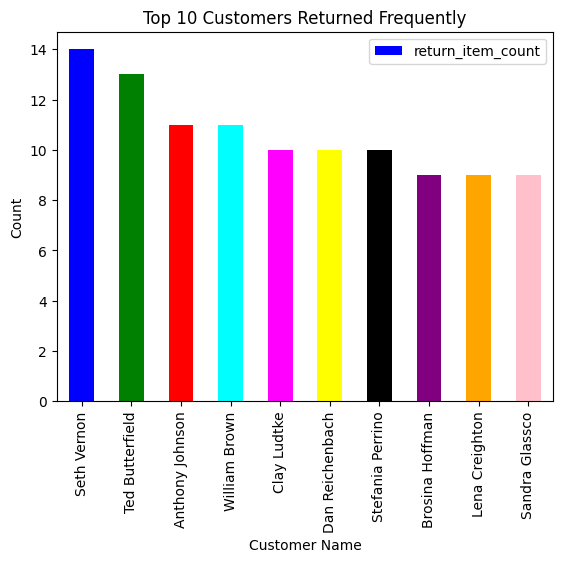

In [46]:
x=pd.read_sql(''' select Returned_items,Customer_Name,count(Returned_items)as return_item_count from store
              group by Returned_items,Customer_Name
              having Returned_items='Returned'
              order by count(Returned_items) desc
              limit 10''',con)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'pink']
x.plot(kind = 'bar',x = 'Customer_Name',y = 'return_item_count',color=colors)
plt.xlabel('Customer Name')
plt.ylabel('Count')
plt.title('Top 10 Customers Returned Frequently')
plt.xticks(rotation = 90)
plt.show()
#

[ ]
Find Top 10 Returned Sub-Categories.:



In [47]:
pd.read_sql(''' select Returned_items,Sub_Category,count(Returned_items)as return_item_count from store
              group by Returned_items,Sub_Category
              having Returned_items='Returned'
              order by count(Returned_items) desc
              limit 10''',con)

,Returned_Items,Sub_Category,return_item_count
0,Returned,Binders,137
1,Returned,Paper,123
2,Returned,Phones,77
3,Returned,Furnishings,72
4,Returned,Accessories,61
5,Returned,Storage,57
6,Returned,Chairs,53
7,Returned,Art,47
8,Returned,Appliances,40
9,Returned,Tables,30


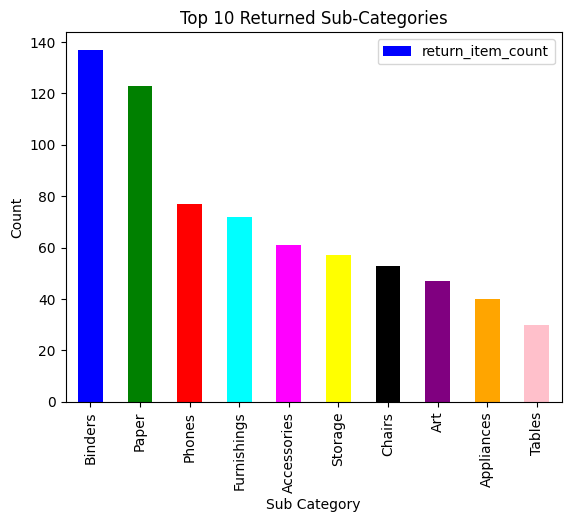

In [48]:
y=pd.read_sql(''' select Returned_items,Sub_Category,count(Returned_items)as return_item_count from store
              group by Returned_items,Sub_Category
              having Returned_items='Returned'
              order by count(Returned_items) desc
              limit 10''',con)
colors=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'pink']
y.plot(kind = 'bar',x = 'Sub_Category',y = 'return_item_count',color=colors)
plt.xlabel('Sub Category')
plt.ylabel('Count')
plt.title('Top 10 Returned Sub-Categories')
plt.xticks(rotation = 90)
plt.show()
#

### **Calculate percentage profit and group by them with Product Name and Order_Id.**

In [50]:
pd.read_sql(''' select ((profit/((sales-profit))*100)) as percentage_profit,product_name,order_id from store
              group by percentage_profit,product_name,order_id
              order by percentage_profit desc''',con)
#

,percentage_profit,Product_Name,Order_ID
0,100.000000,"""While you Were Out"" Message Book, One Form pe...",CA-2014-123491
1,100.000000,Adams Telephone Message Book w/Frequently-Call...,CA-2011-100762
2,100.000000,Adams Telephone Message Book w/Frequently-Call...,CA-2011-131926
3,100.000000,Adams Telephone Message Book w/Frequently-Call...,CA-2012-149811
4,100.000000,Adams Telephone Message Book w/Frequently-Call...,CA-2014-121580
...,...,...,...
9978,-72.972973,Hoover Commercial Lightweight Upright Vacuum,CA-2014-165099
9979,-73.333333,Hoover Shoulder Vac Commercial Portable Vacuum,CA-2012-164007
9980,-73.333333,Kensington 6 Outlet SmartSocket Surge Protector,CA-2012-107083
9981,-73.333333,Eureka Disposable Bags for Sanitaire Vibra Gro...,US-2014-155299


### **Average sales per sub-cat**

In [51]:
pd.read_sql(''' select sub_category,avg(sales) as average_sales from store
              group by sub_category
              order by average_sales desc''',con)
#

,Sub_Category,average_sales
0,Copiers,2198.941618
1,Machines,1645.553313
2,Tables,648.794771
3,Chairs,532.332420
4,Bookcases,503.859633
5,Phones,371.211534
6,Storage,264.590553
7,Supplies,245.650200
8,Appliances,229.768374
9,Accessories,215.974604


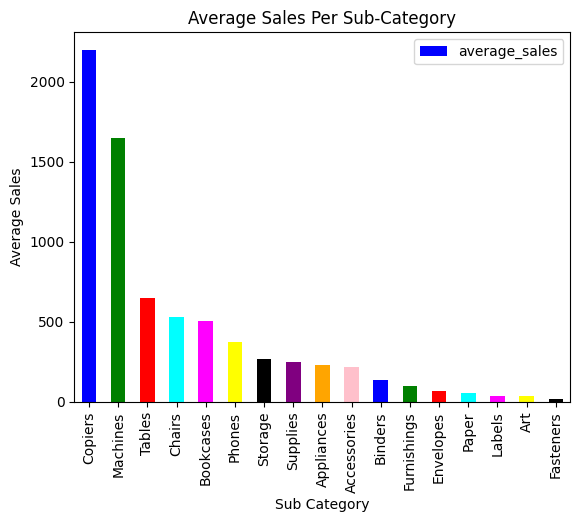

In [55]:
a=pd.read_sql(''' select sub_category,avg(sales) as average_sales from store
              group by sub_category
              order by average_sales desc''',con)
colors=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'pink']
a.plot(kind = 'bar',x = 'Sub_Category',y = 'average_sales',color=colors)
plt.xlabel('Sub Category')
plt.ylabel('Average Sales')
plt.title('Average Sales Per Sub-Category')
plt.xticks(rotation = 90)
plt.show()
#

1. What is the total sales amount?

In [56]:
pd.read_sql(''' select sum(sales) as total_sales from store''',con)

,total_sales
0,2.295810e+06


2. How many unique customers are there?

In [57]:
pd.read_sql(''' select count(distinct customer_name) as unique_customers from store''',con)

,unique_customers
0,793


3. Which customer generated the highest sales?


In [58]:
pd.read_sql(''' select customer_name,sum(sales) as total_sales from store
              group by customer_name
              order by total_sales desc
              limit 1''',con)


,Customer_Name,total_sales
0,Sean Miller,25043.05


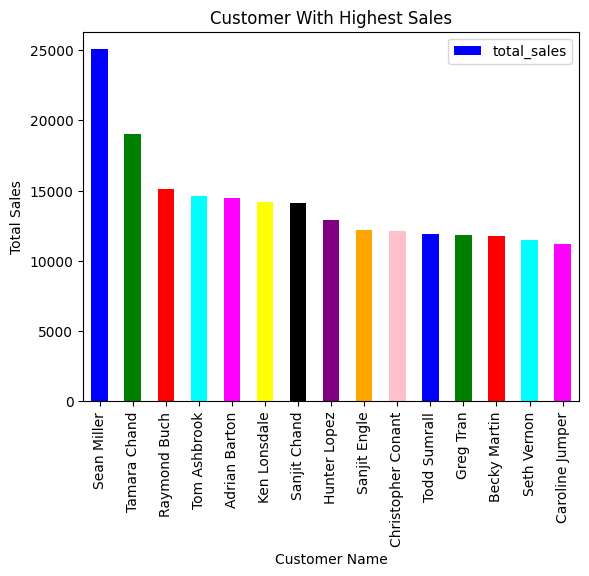

In [60]:
z=pd.read_sql(''' select customer_name,sum(sales) as total_sales from store
              group by customer_name
              order by total_sales desc
              limit 15''',con)
z.plot(kind = 'bar',x = 'Customer_Name',y = 'total_sales',color=colors)
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.title('Customer With Highest Sales')
plt.xticks(rotation = 90  )
plt.show()

4. What is the average profit per order?


In [61]:
pd.read_sql(''' select order_id,avg(profit) as average_profit from store
              group by order_id
              order by average_profit desc
          ''',con)
#

,Order_ID,average_profit
0,CA-2014-166709,5039.985600
1,CA-2013-117121,4946.370000
2,CA-2014-140151,2244.824000
3,CA-2011-145541,2239.987200
4,CA-2013-118689,1752.477820
...,...,...
5002,US-2014-120390,-1306.550400
5003,CA-2012-116638,-1862.312400
5004,US-2014-168116,-1912.669700
5005,CA-2013-108196,-2297.458267


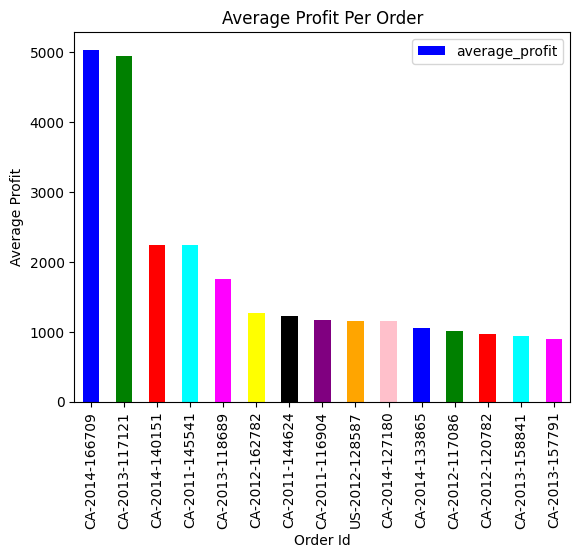

In [64]:
x=pd.read_sql(''' select order_id,avg(profit) as average_profit from store
              group by order_id
              order by average_profit desc
              limit 15
          ''',con)
x.plot(kind = 'bar',x = 'Order_ID',y = 'average_profit',color=colors)
plt.xlabel('Order Id')
plt.ylabel('Average Profit')
plt.title('Average Profit Per Order')
plt.xticks(rotation = 90)
plt.show()
#

In [63]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'States',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Discount_Amount', 'Years', 'Customer_Duration', 'Returned_Items',
       'Return_Reason'],
      dtype='object')

5. How many orders were returned?


In [66]:
pd.read_sql('''select count(returned_items) as returned_orders from store
              where returned_items = 'Returned'
          ''',con)

,returned_orders
0,800


6. What is the total discount amount given?


In [68]:
pd.read_sql('''select sum(discount) as total_discount from store
          ''',con)

,total_discount
0,1560.69


7. Which product category generated the most profit?


In [74]:
pd.read_sql('''select category,sum(profit) as total_profit from store
              group by category
              order by total_profit desc
              limit 1
          ''',con)

,Category,total_profit
0,Technology,145454.9481


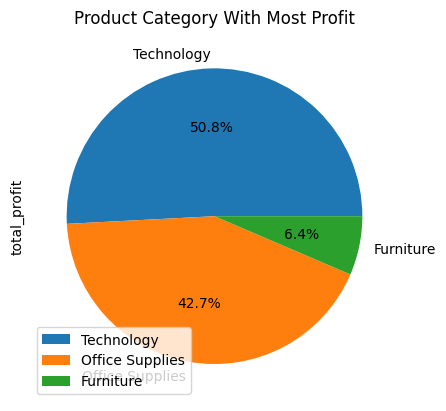

In [73]:
x=pd.read_sql('''select category,sum(profit) as total_profit from store
              group by category
              order by total_profit desc
          ''',con)
x.plot(kind='pie',y='total_profit',autopct='%1.1f%%', labels=x['Category'])
plt.title('Product Category With Most Profit')
plt.show()

8. How many orders were shipped after more than 3 days?


In [77]:
pd.read_sql('''SELECT COUNT(*) AS Late_Shipments
FROM store
WHERE JULIANDAY(Ship_Date) - JULIANDAY(Order_Date) > 3;
''',con)

,Late_Shipments
0,6764


9. What are the top 5 cities by sales?


In [78]:
pd.read_sql('''select city,sum(sales) as total_sales from store
              group by city
              order by total_sales desc
              limit 5
          ''',con)
#

,City,total_sales
0,New York City,256368.161
1,Los Angeles,175851.341
2,Seattle,119540.742
3,San Francisco,112669.092
4,Philadelphia,109077.013


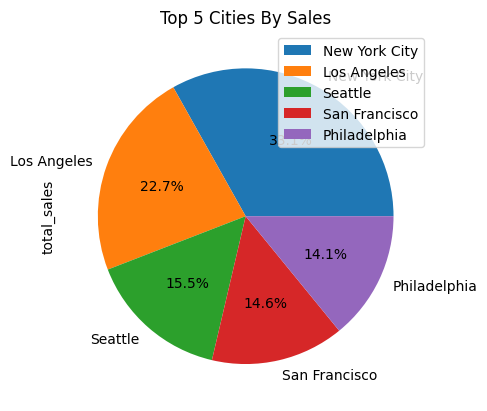

In [82]:
x=pd.read_sql('''select city,sum(sales) as total_sales from store
              group by city
              order by total_sales desc
              limit 5
          ''',con)
x.plot(kind='pie',y='total_sales',autopct='%1.1f%%', labels=x['City'])
plt.title('Top 5 Cities By Sales')
plt.show()

In [84]:
import plotly.express as px

fig = px.pie(x, values='total_sales', names='City', hole=0.5)
fig.show()


10. What is the average discount percentage per order?


In [86]:
pd.read_sql('''select order_id,avg(discount) as average_discount from store
              group by order_id
              order by average_discount desc
          ''',con)

,Order_ID,average_discount
0,US-2014-155299,0.8
1,US-2014-152366,0.8
2,US-2014-148551,0.8
3,US-2014-145863,0.8
4,US-2014-144582,0.8
...,...,...
5002,CA-2011-100860,0.0
5003,CA-2011-100762,0.0
5004,CA-2011-100706,0.0
5005,CA-2011-100391,0.0


11. How many orders were placed in each region?


In [87]:
pd.read_sql('''select region,count(order_id) as total_orders from store
              group by region
              order by total_orders desc
          ''',con)

,Region,total_orders
0,West,3202
1,East,2847
2,Central,2321
3,South,1619


In [88]:
x=pd.read_sql('''select region,count(order_id) as total_orders from store
              group by region
              order by total_orders desc
          ''',con)
fig = px.pie(x, values='total_orders', names='Region', hole=0.5)
fig.show()


12. Which product had the highest sales volume?


In [89]:
pd.read_sql('''select product_name,sum(sales) as total_sales from store
              group by product_name
              order by total_sales desc
              limit 1
          ''',con)

,Product_Name,total_sales
0,Canon imageCLASS 2200 Advanced Copier,61599.824


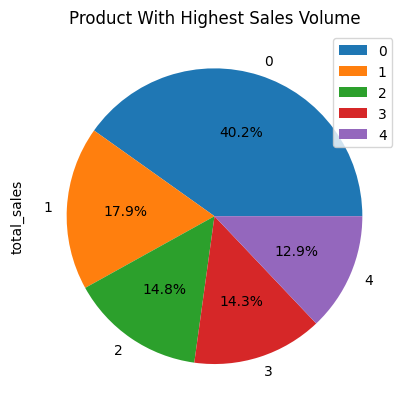

In [93]:
z=pd.read_sql('''select product_name,sum(sales) as total_sales from store
              group by product_name
              order by total_sales desc
              limit 5
          ''',con)
z.plot(kind='pie',y='total_sales',autopct='%1.1f%%')
plt.title('Product With Highest Sales Volume')
plt.show()
#

13. What is the total profit by year?


In [94]:
pd.read_sql('''select strftime('%Y',order_date) as year,sum(profit) as total_profit from store
              group by year
              order by total_profit desc
          ''',con)

,year,total_profit
0,2016,93350.5181
1,2015,81702.7348
2,2014,61594.4077
3,2013,49543.9741


In [96]:
s=pd.read_sql('''select strftime('%Y',order_date) as year,sum(profit) as total_profit from store
              group by year
              order by total_profit desc
          ''',con)
fig=px.pie(s, values='total_profit', names='year', hole=0.5)
fig.show()

14. What is the most common return reason?


In [97]:
pd.read_sql('''select return_reason,count(return_reason) as total_returns from store
              group by return_reason
              order by total_returns desc
          ''',con)


,Return_Reason,total_returns
0,Not Returned,9189
1,Product Description Inaccurate,304
2,Customer Dissatified With Product,158
3,Product Arrived After Promised Delivery Date,100
4,Product Damaged,90
5,Product Ordered Accidently,81
6,Incorrect Products Delivered,67


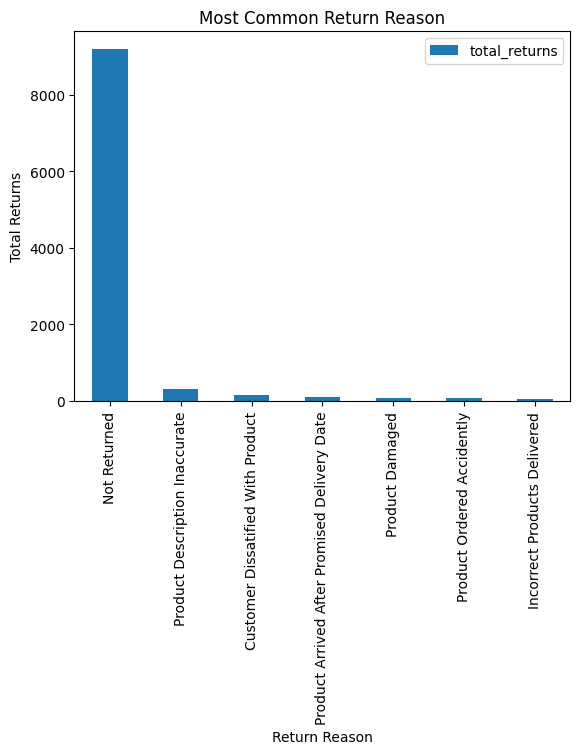

In [99]:
x=pd.read_sql('''select return_reason,count(return_reason) as total_returns from store
              group by return_reason
              order by total_returns desc
          ''',con)
x.plot(kind='bar',x='Return_Reason',y='total_returns')
plt.xlabel('Return Reason')
plt.ylabel('Total Returns')
plt.title('Most Common Return Reason')
plt.xticks(rotation = 90)
plt.show()


15. How many orders were placed in each segment?


In [100]:
pd.read_sql('''select segment,count(order_id) as total_orders from store
              group by segment
              order by total_orders desc
          ''',con)
#

,Segment,total_orders
0,Consumer,5187
1,Corporate,3019
2,Home Office,1783


In [101]:
x=pd.read_sql('''select segment,count(order_id) as total_orders from store
              group by segment
              order by total_orders desc
          ''',con)
fig = px.pie(x, values='total_orders', names='Segment', hole=0.5)
fig.show()

16. What is the average order value (AOV)?


In [102]:
pd.read_sql('''select order_id,avg(sales) as average_order_value from store
              group by order_id
              order by average_order_value desc
          ''',con)
#

,Order_ID,average_order_value
0,CA-2014-166709,10499.970
1,CA-2013-117121,9892.740
2,CA-2011-145541,6999.960
3,CA-2014-140151,4684.160
4,CA-2011-144624,4548.810
...,...,...
5002,US-2014-100209,1.080
5003,US-2011-152723,0.876
5004,CA-2011-112403,0.852
5005,CA-2013-168361,0.836


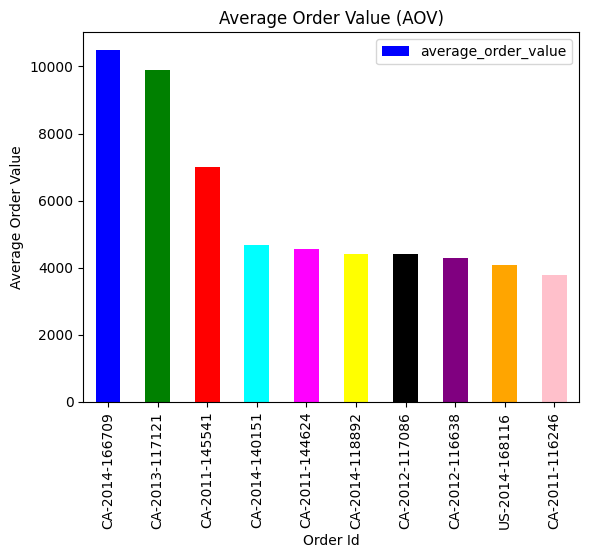

In [104]:
x=pd.read_sql('''select order_id,avg(sales) as average_order_value from store
              group by order_id
              order by average_order_value desc
              limit 10
          ''',con)
x.plot(kind='bar',x='Order_ID',y='average_order_value',color=colors)
plt.xlabel('Order Id')
plt.ylabel('Average Order Value')
plt.title('Average Order Value (AOV)')
plt.xticks(rotation = 90)
plt.show()


17. Which customer has the longest relationship with the company?


In [105]:
pd.read_sql('''select customer_name,julianday(ship_date)-julianday(order_date) as relationship_days from store
              group by customer_name
              order by relationship_days desc
              limit 1
          ''',con)


,Customer_Name,relationship_days
0,William Brown,7.0


18. Which ship mode is most commonly used?


In [107]:
pd.read_sql('''select ship_mode,count(ship_mode) as total_ship_mode from store
              group by ship_mode
              order by total_ship_mode desc
          ''',con)


,Ship_Mode,total_ship_mode
0,Standard Class,5965
1,Second Class,1945
2,First Class,1537
3,Same Day,542


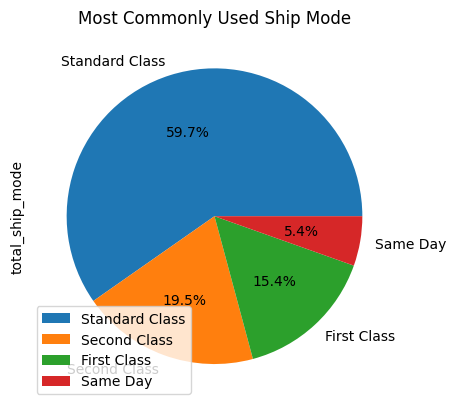

In [108]:
x=pd.read_sql('''select ship_mode,count(ship_mode) as total_ship_mode from store
              group by ship_mode
              order by total_ship_mode desc
          ''',con)
x.plot(kind='pie',y='total_ship_mode',autopct='%1.1f%%', labels=x['Ship_Mode'])
plt.title('Most Commonly Used Ship Mode')
plt.show()

19. What is the profit margin (Profit/Sales) for each product category?


In [109]:
pd.read_sql('''select category,sum(profit)/sum(sales) as profit_margin from store
              group by category
              order by profit_margin desc
          ''',con)


,Category,profit_margin
0,Technology,0.173957
1,Office Supplies,0.170396
2,Furniture,0.024867


In [110]:
x=pd.read_sql('''select category,sum(profit)/sum(sales) as profit_margin from store
              group by category
              order by profit_margin desc
          ''',con)
fig = px.pie(x, values='profit_margin', names='Category', hole=0.5)
fig.show()

20. Which state generated the highest sales?


In [111]:
pd.read_sql('''select states,sum(sales) as total_sales from store
              group by states
              order by total_sales desc
              limit 1
          ''',con)

,States,total_sales
0,California,457445.6715


21. How many orders were placed per year?


In [112]:
pd.read_sql('''select strftime('%Y',order_date) as year,count(order_id) as total_orders from store
              group by year
              order by total_orders desc
          ''',con)

,year,total_orders
0,2016,3316
1,2015,2579
2,2014,2101
3,2013,1993


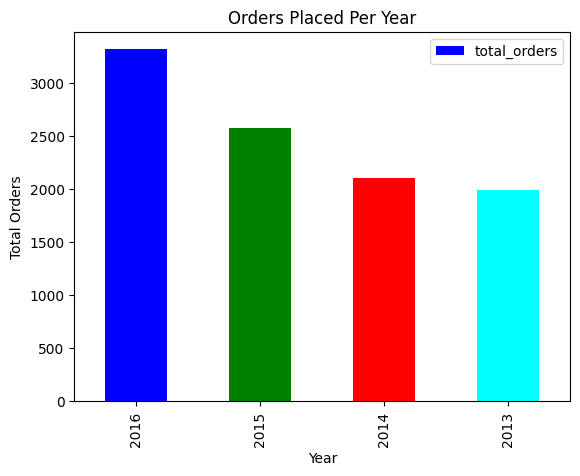

In [114]:
x=pd.read_sql('''select strftime('%Y',order_date) as year,count(order_id) as total_orders from store
              group by year
              order by total_orders desc
          ''',con)
x.plot(kind='bar',x='year',y='total_orders',color=colors)
plt.xlabel('Year')
plt.ylabel('Total Orders')
plt.title('Orders Placed Per Year')
plt.xticks(rotation = 90)
plt.show()

22. Which product sub-category has the highest return rate?


In [115]:
pd.read_sql('''select sub_category,count(returned_items) as total_returns from store
              where returned_items = 'Returned'
              group by sub_category
              order by total_returns desc
              limit 1
          ''',con)

,Sub_Category,total_returns
0,Binders,137


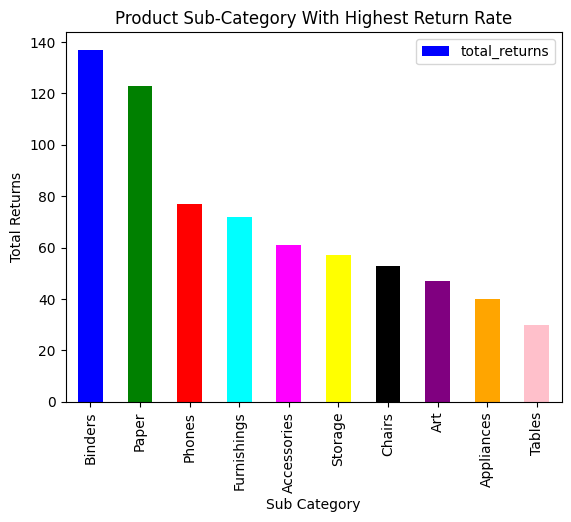

In [116]:
x=pd.read_sql('''select sub_category,count(returned_items) as total_returns from store
              where returned_items = 'Returned'
              group by sub_category
              order by total_returns desc
              limit 10
          ''',con)
x.plot(kind='bar',x='Sub_Category',y='total_returns',color=colors)
plt.xlabel('Sub Category')
plt.ylabel('Total Returns')
plt.title('Product Sub-Category With Highest Return Rate')
plt.xticks(rotation = 90)
plt.show()

23. What is the average customer duration?


In [117]:
pd.read_sql('''select customer_name,julianday(ship_date)-julianday(order_date) as customer_duration from store
              group by customer_name
              order by customer_duration desc
          ''',con)


,Customer_Name,customer_duration
0,William Brown,7.0
1,Victoria Brennan,7.0
2,Trudy Schmidt,7.0
3,Tom Ashbrook,7.0
4,Tiffany House,7.0
...,...,...
788,Barry Gonzalez,0.0
789,Annie Zypern,0.0
790,Andrew Roberts,0.0
791,Andrew Allen,0.0


24. Which region has the highest average order value?


In [118]:
pd.read_sql('''select region,avg(sales) as average_order_value from store
              group by region
              order by average_order_value desc
          ''',con)

,Region,average_order_value
0,South,241.713878
1,East,238.283844
2,West,226.488402
3,Central,215.797247


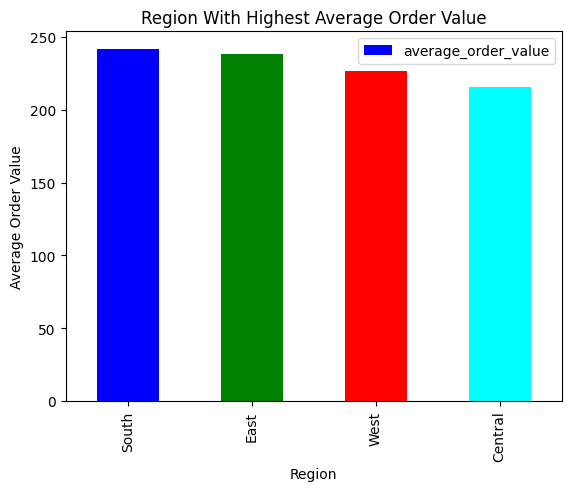

In [120]:
x=pd.read_sql('''select region,avg(sales) as average_order_value from store
              group by region
              order by average_order_value desc
          ''',con)
x.plot(kind='bar',x='Region',y='average_order_value',color=colors)
plt.xlabel('Region')
plt.ylabel('Average Order Value')
plt.title('Region With Highest Average Order Value')
plt.xticks(rotation = 90)
plt.show()

25. How many orders had a profit margin greater than 20%?


In [121]:
pd.read_sql('''select order_id,sum(profit)/sum(sales) as profit_margin from store
              group by order_id
              having profit_margin > 0.2
          ''',con)

,Order_ID,profit_margin
0,CA-2011-100006,0.290000
1,CA-2011-100293,0.350000
2,CA-2011-100328,0.337500
3,CA-2011-100363,0.361115
4,CA-2011-100391,0.460000
...,...,...
2656,US-2014-167318,0.350481
2657,US-2014-167920,0.418539
2658,US-2014-168802,0.325000
2659,US-2014-169488,0.467028


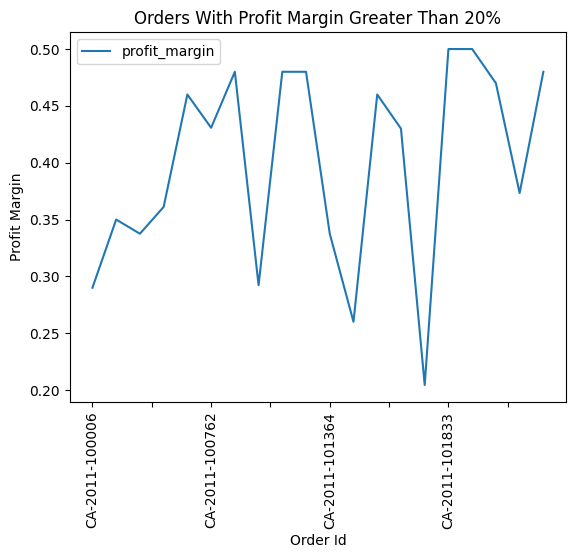

In [122]:
x=pd.read_sql('''select order_id,sum(profit)/sum(sales) as profit_margin from store
              group by order_id
              having profit_margin > 0.2
              limit 20
          ''',con)
x.plot(kind='line',x='Order_ID',y='profit_margin')
plt.xlabel('Order Id')
plt.ylabel('Profit Margin')
plt.title('Orders With Profit Margin Greater Than 20%')
plt.xticks(rotation = 90)
plt.show()

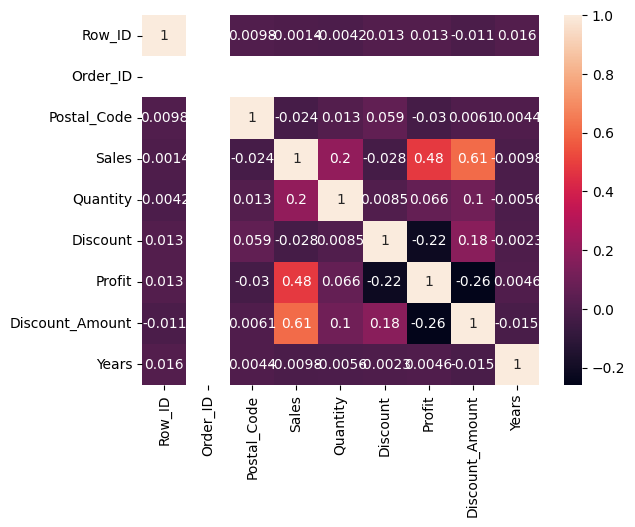

In [126]:

df['Order_ID'] = pd.to_numeric(df['Order_ID'], errors='coerce')
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True)
plt.show()


# Insights from the data:

 1. **Customer with the Highest Sales:** Tamara Chand generated the highest sales. Consider strategies for customer retention and potentially offering personalized promotions to high-value customers like Tamara.

 2. **Average Profit per Order:** The average profit per order varies significantly. Analyze factors contributing to high-profit orders and identify areas for improvement in low-profit orders.

 3. **Product Category with Most Profit:** Technology products generated the most profit. Focus on promoting and optimizing sales within this category.

 4. **Top 5 Cities by Sales:** New York City, Los Angeles, Seattle, San Francisco, and Philadelphia are the top 5 cities by sales. Consider targeted marketing campaigns or inventory optimization for these high-performing locations.

 5. **Orders Placed Per Year:** The number of orders placed fluctuates yearly. Investigate potential seasonality trends and adjust inventory or marketing efforts accordingly.

6. **Product Sub-Category with Highest Return Rate:**  Binders have the highest return rate. Analyze reasons for returns in this sub-category and implement strategies to reduce them, such as improved product descriptions or quality control.

7. **Region with Highest Average Order Value:** The West region has the highest average order value. Explore factors contributing to this and consider replicating successful strategies in other regions.

8. **Orders with Profit Margin Greater Than 20%:**  Several orders achieved a profit margin greater than 20%. Analyze these orders to identify common characteristics and leverage those insights for future sales.
